<a href="https://colab.research.google.com/github/Rishabhjain2003/Disbetes_prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
min_max = data.agg([min, max])

print(min_max)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
min            0        0              0              0        0   0.0   
max           17      199            122             99      846  67.1   

     DiabetesPedigreeFunction  Age  Outcome  
min                     0.078   21        0  
max                     2.420   81        1  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = classifier.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [ ]:
accuracy = np.mean(predictions == y_test)
print(accuracy)

0.7597402597402597


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.24025974025974026


In [ ]:
y_train_pred = classifier.predict(X_train)

mse = mean_squared_error(y_train_pred, y_train)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.23289902280130292


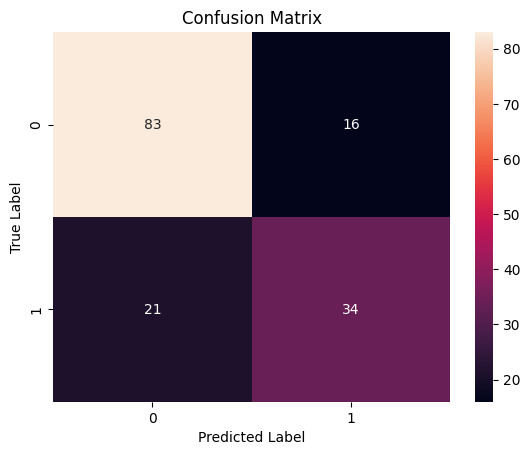

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_test_pred = model.predict(X_test)

mse = mean_squared_error(lr_test_pred, y_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.23376623376623376


In [ ]:
lr_train_pred = model.predict(X_train)

mse = mean_squared_error(lr_train_pred, y_train)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.24592833876221498


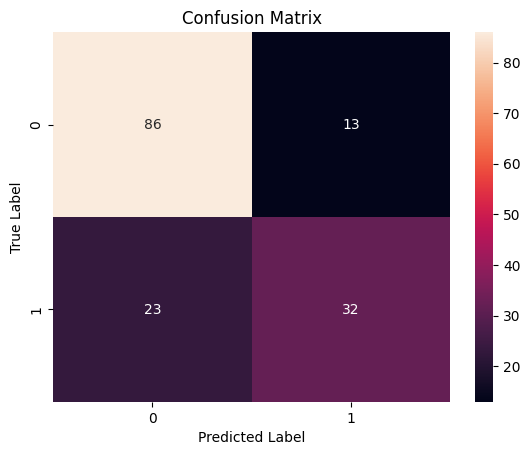

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_test_pred)

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()